# Short introduction to Jupyter Lab and Jupyter Notebooks


## Setup
If you see this file, then you may have already done these steps, but be sure to finish them if you haven't yet. 

 * go to https://jupyter.org/try
 * click "Try JupyterLab"
 * close open tabs in the Lab (not necessary, just less confusing)
 * open a terminal in the Lab (File>New>Terminal)
 * paste the following lines into the terminal to get the jupyter notebook:<br/>
`wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/explorejupyternotebooks/ExploreECO.ipynb?token=AHJ5VUHE2TIJTDFMWSWZ3Q3AYJNOA -O /home/jovyan/demo/ExploreECO.ipynb`  
`wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/explorejupyternotebooks/ECO_dr1_subset.csv?token=AHJ5VUHX7IOUT4GQAXBOVJ3AYJNQQ -O /home/jovyan/demo/ECO_dr1_subset.csv`
 * Additionally, type this into the terminal to get the astroML package: `pip install astroML`
 * if necessary, click the refresh page (curled arrow) at the top of the webpage
 * launch the jupyter notebook by double clicking on it
 * you can run or re-run individual cells in the notebook by clicking on them and typing Ctrl-Enter.

In [3]:
"""
This is a very short jupyter notebook to explore ECO (a survey of galaxies). The mini-project will be to compare the u-r color 
vs. stellar mass for ECO galaxies.
Author: Sheila Kannappan | Modified by: Derrick Carr
Created: August 2016 | Modified: May 2021
"""

"""
To start, this is an jupyter notebook within the JupyterLab environment. Each cell is run by pressing Shift + Enter.
You can also have cells that are just text (these are called Markdown cells), running those cells just turns it into the text you see.
You will typically want to run the cells in order. If you try to run one of the later cells first, it may say something such as that you 
don't have 'np' package imported, as the import command is in this first code cells

Try to follow along below to get an idea of how Jupyter Notebooks can be used. 
"""



# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

We usually obtain ECO data with a sql query to the ECO DR1 "searchable database" linked [here](http://resolve.astro.unc.edu/pages/database.php). Note the examples of sql queries given below the database link on the [same page](http://resolve.astro.unc.edu/pages/database.php). 

To perform the query, I first switched the output choice from "browse the results of the query" to "download the results of the query (CSV)". Then I typed:

`select name, cz, logmstar, modelu_rcorr, r90, morphel, grpcz, fc, logmh, den1mpc where name != "bunnyrabbits"`

Here `!=` signifies "not equal to" and is a way of just getting everything, since none of our galaxies are named "bunnyrabbits". My sql query included a number of extra variables just to see how the query fully works.

For now, this file should have been downloaded using a wget command in the terminal

Below I'm reading in the csv file (which I saved to the same directory as this jupyter notebook) using `np.genfromtxt`, which is more powerful than np.loadtxt and allows me to read in the column names.

In [4]:
data = np.genfromtxt("ECO_dr1_subset.csv", delimiter=",", dtype=None, names=True, encoding=None) # better than np.loadtxt if have column names

Look at the column names available from the csv file.

In [5]:
data.dtype.names

('NAME',
 'CZ',
 'LOGMSTAR',
 'MODELU_RCORR',
 'R90',
 'MORPHEL',
 'GRPCZ',
 'FC',
 'LOGMH',
 'DEN1MPC')

Address a column by name to see its contents.

In [6]:
data['LOGMSTAR'] #log stellar mass in units of solar masses

array([10.73,  9.37,  8.19, ...,  8.97,  9.81,  9.39])

Pull out the variables for the mini-project and choose only the values that are "good" to display. (I figured out that there were some bad values by trial and error.)

In [7]:
logmstar = data['LOGMSTAR']
urcolor = data['MODELU_RCORR'] #this is a color, redder galaxies have higher numbers (around 2) while bluer galaxies have lower numbers (around 1)
sel = np.where((urcolor > -99) & (logmstar > 0) & (logmstar > 9.))
logmstar = logmstar[sel]
urcolor = urcolor[sel]

Run the below code to make a u-r vs. Mstars plot for ECO. The plot will include orange density regions laid overtop black points. The orange just shows roughly how many galaxies fall in that region on the plot, as ECO has over 10000 galaxies -- that's too many points to put on one plot. 

Text(0, 0.5, 'u-r color')

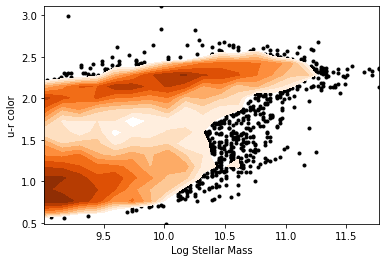

In [8]:
fig1, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
#axcolormstar.plot(logmstar,urcolor,'g.')
scatter_contour(logmstar, urcolor, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Oranges))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")
#axcolormstar.plot([10.5,10.5],[min(urcolor),max(urcolor)])

As you can see, Jupyter Notebooks are pretty straight-forward and are a great tool for plot presentations and text to supplement your code. You will get more experience with them in the bootcamp as many of the tutorials use this format. 

For now, use the same galaxies to create a plot similar to the one above, except have the plot be R90 vs stellar mass (where R90 is the radius at which 90% of the galaxy's light is within) HINT: you may have to modify the R90 column slightly like you did above. I'd suggest doing that in the same cell where you did this for logmstar and urcolor. Just to b

Feel free to use the same plotting command to create other plots! For example, u-r color vs logmh (Mass of the galaxy's dark matter halo) may yield some interesting results.